### User Overview Analysis 

In [1]:
# import nessary libraries 
import os
import sys
import pandas as pd
import numpy as np

# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
from src.data_quality_check import DataQualityCheck
from scripts.overview_analyser import UserOverviewAnalysis

In [2]:
from DBConnection.connection import PostgresConnection

In [3]:
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [4]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [5]:
df=db.fetch_data(query)
db.disconnect()
df.head()

Connection closed!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.shape

(150001, 55)

### Data Cleaning and fix outliers

In [9]:
data_quality=DataQualityCheck(df)
data_quality.check_missing_data(df)

,Feature,Missing in %
0,Dur. (ms).1,100.00
1,Nb of sec with 37500B < Vol UL,86.84
2,Nb of sec with 6250B < Vol UL < 37500B,74.56
3,Nb of sec with 125000B < Vol DL,65.02
4,TCP UL Retrans. Vol (Bytes),64.43
5,Nb of sec with 31250B < Vol DL < 125000B,62.39
6,Nb of sec with 1250B < Vol UL < 6250B,61.93
7,Nb of sec with 6250B < Vol DL < 31250B,58.88
8,TCP DL Retrans. Vol (Bytes),58.76
9,HTTP UL (Bytes),54.54


In [10]:
data_quality.check_duplicate_data(df)

'Success: No duplicate data!'

In [12]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
columns_to_fix_outliers = [
    'Dur. (ms).1', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with 125000B < Vol DL', 'TCP UL Retrans. Vol (Bytes)',
    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 1250B < Vol UL < 6250B',
    'Nb of sec with 6250B < Vol DL < 31250B', 'TCP DL Retrans. Vol (Bytes)',
    'HTTP UL (Bytes)', 'HTTP DL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'UL TP < 10 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
    'UL TP > 300 Kbps (%)', 'Nb of sec with Vol UL < 1250B', 'DL TP > 1 Mbps (%)',
    '250 Kbps < DL TP < 1 Mbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
    'DL TP < 50 Kbps (%)', 'Nb of sec with Vol DL < 6250B'
]
data_quality.fix_outliers(df,columns_to_fix_outliers)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,Mon Apr 29 2019 10:28:42 GMT+0300 (East Africa...,451.0,Tue Apr 30 2019 09:02:33 GMT+0300 (East Africa...,214.0,8.123076e+07,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,Mon Apr 29 2019 10:28:42 GMT+0300 (East Africa...,483.0,Tue Apr 30 2019 13:41:33 GMT+0300 (East Africa...,187.0,9.797070e+07,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,Mon Apr 29 2019 10:28:43 GMT+0300 (East Africa...,283.0,Tue Apr 30 2019 13:46:12 GMT+0300 (East Africa...,810.0,9.824953e+07,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,Mon Apr 29 2019 10:28:43 GMT+0300 (East Africa...,696.0,Tue Apr 30 2019 13:40:34 GMT+0300 (East Africa...,327.0,9.791063e+07,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


### Expolatory Data Analysis

In [7]:
eda=UserOverviewAnalysis(df)
top_10=eda.top_10_handsets(df)
print(top_10)

Top 10 Handsets Used by Customers:
                   Handset Type  count
0              Huawei B528S-23A  19752
1       Apple iPhone 6S (A1688)   9419
2        Apple iPhone 6 (A1586)   9023
3                     undefined   8987
4        Apple iPhone 7 (A1778)   6326
5       Apple iPhone Se (A1723)   5187
6        Apple iPhone 8 (A1905)   4993
7       Apple iPhone Xr (A2105)   4568
8  Samsung Galaxy S8 (Sm-G950F)   4520
9        Apple iPhone X (A1901)   3813


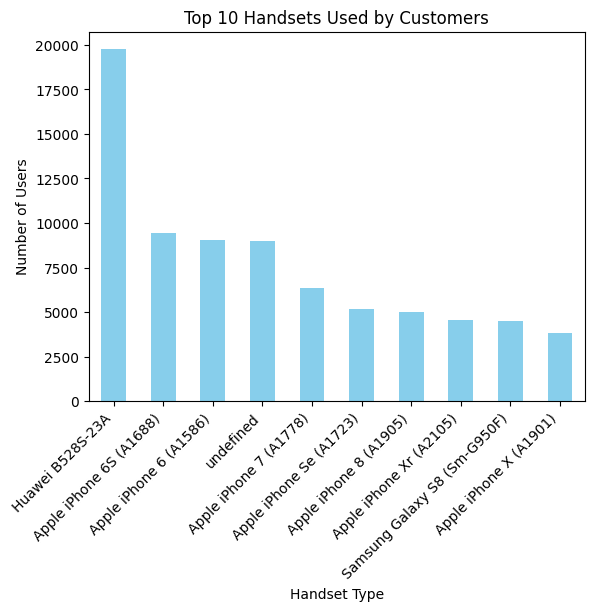

In [8]:
#visualize the top 10 handsets
eda.plot_top_10_handsets(df)